#데이터 재구조화(reshaping)
> 분석과정에서 원본 데이터 구조가 분석하고자 하는 방향과 맞지 않아 구조를 변경하는 작업을 재구조화라고 한다.

> 재구조화 함수는 다음과 같이 사용된다.
* 데이터 구간화 : 데이터의 구간을 동일한 길이(범위, pd.cut)로 구분하거나 동일한 개수(pd.qcut)로 구분하는 방법
* 원-핫인코딩 : 구조를 행열 형태로 변환하여 데이터가 존재하는 곳에만 1로 표시하는 방법
* 데이터 전치 : 행과 열을 변경하는 방법
* 피봇 테이블 : 전체 데이터에서 필요한 부분을 분리하여 별도의 테이블을 생성하는 방법
* 열, 행 전환 : 열을 행으로 변환하는 방법
* 행, 열 인텍스 전환 : 행과 열을 교환할 경우 사용하는 방법

##1. 데이터 구간화

###1.1 간단한 사용법 익히기
> 연속된 데이터를 특정 구간으로 나누어 처리하는 방법으로 간단하게 각 함수별 사용법을 알아보자

####1.1.1 파일 읽기

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

filepath = '/content/drive/MyDrive/2. 데이터 탐색/Data/exam_sample.csv'
df = pd.read_csv(filepath)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


####1.1.2 구간 나누기

In [15]:
df['math'].describe()

count    10.000000
mean     56.500000
std      23.810595
min      20.000000
25%      46.250000
50%      50.000000
75%      75.000000
max      90.000000
Name: math, dtype: float64

> 결과를 확인해 보면 수학 점수의 최소값은 20이며 최대값은 90인 것을 알 수 있다.

In [16]:
df_cut_math = pd.cut(df['math'], 3)
df_cut_math

0    (43.333, 66.667]
1    (43.333, 66.667]
2    (43.333, 66.667]
3     (19.93, 43.333]
4      (66.667, 90.0]
5    (43.333, 66.667]
6      (66.667, 90.0]
7      (66.667, 90.0]
8     (19.93, 43.333]
9    (43.333, 66.667]
Name: math, dtype: category
Categories (3, interval[float64]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]]

> cut 함수는 입력된 데이터의 범위를 n등분하게 된다. 위의 코드에서 수학 점수를 기준으로 범위를 3등분하게 되며 수학 점수의 최소값 20에서 최대값 90까지를 3등분하게 된다.

> 실행 결과 다음과 같은 구간으로 나뉘게 된다.
* 1구간 : 19.93, 43.333
* 2구간 : 43.333, 66.667
* 3구간 : 66.667, 90.0

####1.1.3 구간별 그룹화

In [ ]:
df_cut_math_group = df['math'].groupby(df_cut_math)
df_cut_math_group.mean()

> 위에서 얻은 구간 별로 그룹화하여 평균을 구해보았다.

In [18]:
df_cut_math_group.agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
math,,,,,
"(19.93, 43.333]",2,25.000000,7.071068,20,30
"(43.333, 66.667]",5,51.000000,5.477226,45,60
"(66.667, 90.0]",3,86.666667,5.773503,80,90


> 기본이 되는 집계함수는 문자열 형식으로 처리할 수 있다.

####1.1.4 레이블화

In [ ]:
df_cut_math= pd.cut(df['math'], 3, labels=['C학점','B학점','A학점' ])
df_cut_math

> 구간을 지정할 때 위와 같이 label을 이용하여 처리가 가능하며 가장 아래 부분에 Categories (3, object): ['C학점' < 'B학점' < 'A학점'] 형식으로 크기를 알 수 있다.

In [ ]:
df_cut_math_group = df['math'].groupby(df_cut_math)
df_cut_math_group.agg(['count', 'mean', 'std', 'min', 'max'])

>그룹화 진행 후 결과를 확인해 보면 가독성이 높게 나타난 것을 볼 수 있다.

####1.1.5 개수 나누기
> 전체 데이터를 n분하는 것으로 qcut 함수를 이용한다.

In [ ]:
df['english'].describe()

> 최소값 78부터 최대값 98까지 데이터가 분포되어 있다.

In [ ]:
df_qcut_english = pd.qcut(df['english'], 3)
df_qcut_english

> qcut은 범위가 아닌 개수를 n등분하는 함수이다. 실행 결과 다음과 같은 값이 나왔다.
* 1구간 : 77.999, 89.0
* 2구간 : 89.0, 97.0
* 3구간 : 97.0, 98.0

> 위의 분석 내용에서 보듯이 범위가 균등하지 않을 것을 알 수 있다.

In [ ]:
df_cut_english_group = df['english'].groupby(df_qcut_english)
df_cut_english_group.agg(['count', 'mean', 'std', 'min', 'max'])

>위의 실행 결과 count가 고르게 분포되어 있는 것을 볼 수 있다.

In [ ]:
df_qcut_english = pd.qcut(df['english'], 3, labels=False)
df_qcut_english

In [ ]:
df_cut_english_group = df['english'].groupby(df_qcut_english)
df_cut_english_group.agg(['count', 'mean', 'std', 'min', 'max'])

> 레이블을 false로 지정하면 0부터 순차적인 숫자로 표현되게 된다.

###1.2 구간화 목적
> 구간화를 이용하면 다음과 같은 문제를 해결할 수 있다.
* 이상치로 발생 가능한 문제를 완화 시켜줄 수 있다.
* 결측치 처리를 보다 간편하게 처리할 수 있다.

####1.2.1 이상치 완화

In [ ]:
import pandas as pd

data = [155,167,169,170,171,177,172,182,175,300]
df_student_height = pd.DataFrame(data, columns=['height'])
df_student_height

>학생들의 키정보를 가지고 있는 data라는 리스트를 만들고 이를 dataframe으로 변환시켰다.

In [ ]:
df_student_height.describe()

> 총 데이터는 10개이며 평균은 183 정도로 정상적인 수치로 보인다. 하지만 표준편차가 41로 큰 값이 나타나게 되어 이상치가 존재하는 것을 추측할 수 있다. 최소값과 사분위수는 정상적인 범위내에서 고르게 분포되어 있는 것을 볼 수 있으나 최대값이 300으로 이상치가 존재하는 것을 알 수있다.

In [ ]:
df_student_height_cut = pd.cut(df_student_height['height'], [150,160,170,180,190,240])
df_student_height_cut

>cut 함수에서 범위를 직접 지정하여 사용할 수 있으며 정상 범위가 아닌 데이터는 결측치로 나타나게 된다. 이러한 방법으로 이상치를 완화시킬 수 있다.

####1.2.2 결측치 처리

In [ ]:
df_student_height_group = df_student_height.groupby(df_student_height_cut)
df_student_height_group.agg(['count', 'mean', 'std', 'min', 'max'])

>이상치 발생 시 정상적이지 않은 평균을 얻게 되어 대표값으로 쓸수 없게 된다. 위의 코드에서는 이상치가 발생했을 경우 범위를 지정하여 처리하게 되면 이상치는 결측치로 나타나게 되고 평균을 구하게 되면 결측치가 배제 됨으로 결국 이상치를 배제한 평균을 구할 수 있어 대표갑으로 활용할 수 있게 된다.

##2. 원-핫 인코딩
> 원-핫 인코딩은 사람이 이해하는 언어를 컴퓨터가 쉽게 이해할 수 있도록 행렬로 표현하고 단어가 존재하는 곳은 1로 아닌 곳은 0으로 표현하는 방법이다. 주로 단어 처리를 위해 사용되는 기술로 추후 추천 알고리즘이나 자연어 처리 부분에서 활용할 수 있게 된다.

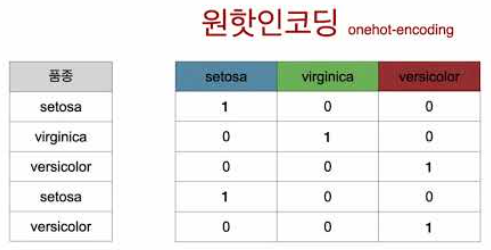

> 위의 그림에서 보듯 품종은 총 3가지이다. 원핫인코딩으로 표현하면 모든 품종을 feature로 넣고 각 행별로 존재하는 값이 있는 부분에 1로 값을 채워 넣는 방법이 원핫인코딩이다.

In [ ]:
print(df.dtypes)
pd.get_dummies(df)

>get_dummies 함수는 type이 object인 데이터를 원-핫인코딩으로 표현한다.